In [63]:
import matplotlib.pyplot as plt
import numpy as np
from kjm2601 import obsidian_media_path as path

# increase fint size for figures
plt.rcParams.update({'font.size': 14})




In [57]:
# set hueckel parameters
alpha = 0.0
beta = -1.0

# set number of atoms
n = 4

In [64]:
# set up the hamiltonian
H = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i == j:
            H[i,j] = alpha
        elif abs(i-j) == 1:
            H[i,j] = beta
        else:
            H[i,j] = 0
            
print(H)


[[ 0. -1.  0.  0.]
 [-1.  0. -1.  0.]
 [ 0. -1.  0. -1.]
 [ 0.  0. -1.  0.]]


In [65]:
# get the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eigh(H)
print('epsilon = ', eigvals)
print('C = ', eigvecs)

#  normalize eigenvectors such that the first element is positive
for i in range(n):
    if eigvecs[0,i] < 0:
        eigvecs[:,i] = -eigvecs[:,i]


epsilon =  [-1.61803399 -0.61803399  0.61803399  1.61803399]
C =  [[-0.37174803  0.60150096  0.60150096 -0.37174803]
 [-0.60150096  0.37174803 -0.37174803  0.60150096]
 [-0.60150096 -0.37174803 -0.37174803 -0.60150096]
 [-0.37174803 -0.60150096  0.60150096  0.37174803]]


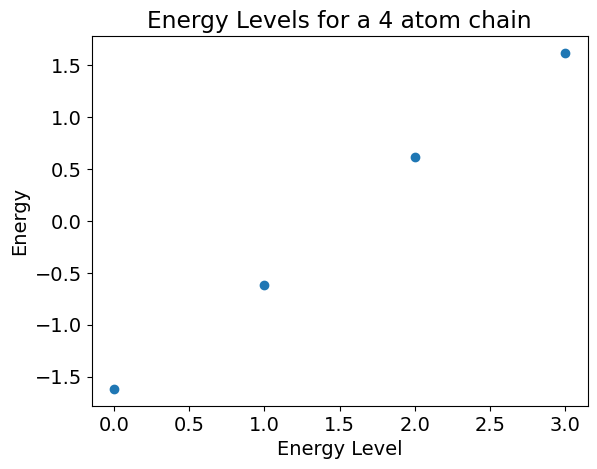

In [66]:
# plot the energy levels
fig, ax = plt.subplots()
ax.plot(eigvals, 'o')
ax.set_xlabel('Energy Level')
ax.set_ylabel('Energy')
ax.set_title(f'Energy Levels for a {n} atom chain')
plt.show()


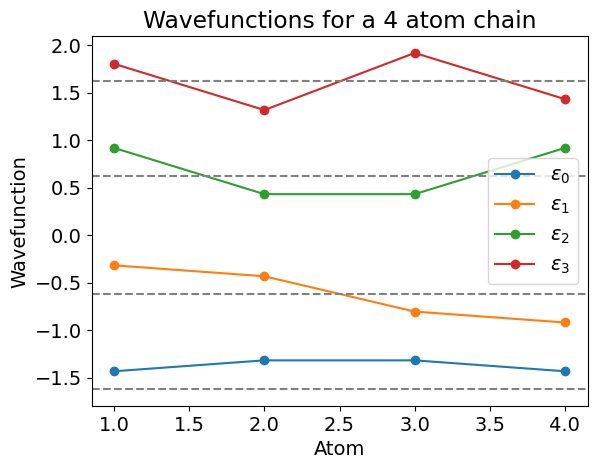

In [67]:
# plot the wavefunctions
fig, ax = plt.subplots()
x = np.arange(1, n+1)
for i in range(n):
    shift = eigvals[i]
    scale = 0.5
    ax.plot(x, shift + scale * eigvecs[:,i], 'o-', label=f'$\epsilon_{i}$')
    axhline = ax.axhline(y=shift, color='gray', linestyle='--')
ax.set_xlabel('Atom')
ax.set_ylabel('Wavefunction')
ax.set_title(f'Wavefunctions for a {n} atom chain')
ax.legend()
plt.show()


In [68]:
# calculate density matrix
P = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        for k in range(n // 2):
            P[i,j] += 2 * eigvecs[i,k] * eigvecs[j,k]
            
for b in range(n-1):
    print(f'Bond order between atom {b} and {b+1}: ', 1 + P[b,b+1])

        

Bond order between atom 0 and 1:  1.8944271909999157
Bond order between atom 1 and 2:  1.4472135954999574
Bond order between atom 2 and 3:  1.8944271909999157
